## Exploratory Data Analysis of 2020 Instagram Data

Features/columns of interest:
- accessibility_caption : very basic image recongition descrip (eg "image contains person, food, table")
- display_url : link to the image

In [1]:
# import libraries
import os
import sys

import pandas as pd
import numpy as np
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import random
import time

from PIL import Image

# !pip install wordcloud
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [2]:
import ast
import re

In [3]:
# # set current working directory to whereever data is stored (csv files)
# os.chdir("/content/drive/My Drive/Colab Notebooks/CKIDS_main/data/food_tags")

In [4]:
# on my local drive
df_kale = pd.read_csv(r'data\df_kale.csv', index_col=0)
df_fries = pd.read_csv(r'data\df_fries.csv', index_col=0)
df_smoothie = pd.read_csv(r'data\df_smoothie.csv', index_col=0)
df_salad = pd.read_csv(r'data\df_salad.csv', index_col=0)
df_burger = pd.read_csv(r'data\df_burger.csv', index_col=0)


In [5]:
## Merge all food hashtag dfs and get some initial information

In [6]:
# df_ig = df_kale.append([df_fries, df_smoothie, df_salad], ignore_index=True)  
df_ig = df_kale.append([df_fries, df_smoothie, df_burger, df_salad], ignore_index=True)  

In [7]:
df_ig.shape

(15210, 55)

In [8]:
df_ig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15210 entries, 0 to 15209
Data columns (total 55 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   file_name                        15206 non-null  object 
 1   descrip                          15202 non-null  object 
 2   hashtags                         15202 non-null  object 
 3   comments_disabled                10364 non-null  object 
 4   __typename                       10364 non-null  object 
 5   id                               10364 non-null  float64
 6   edge_media_to_caption            10364 non-null  object 
 7   shortcode                        10364 non-null  object 
 8   edge_media_to_comment            10364 non-null  object 
 9   taken_at_timestamp               10364 non-null  float64
 10  dimensions                       10364 non-null  object 
 11  display_url                      10364 non-null  object 
 12  edge_liked_by     

In [9]:
# converting taken_at_timestamp to a datetime format
df_ig['timestamp'] = pd.to_datetime(df_ig['taken_at_timestamp'], unit='s')

In [10]:
# num of unique users?
df_ig['username'].nunique()

4589

In [11]:
# check out the ig image recong feature
rand1 = df_ig.sample(10)
print(rand1['accessibility_caption'].iloc[9])
print(rand1['display_url'].iloc[9])
   

nan
nan


In [12]:
# export to one main df
df_ig.to_csv('df_ig.csv')

In [28]:
users = df_ig['username'].unique().tolist()
type(users)

list

### Look at posts with location data

In [12]:
with_loc = df_ig.dropna(subset=['location_name'])

In [13]:
with_loc.shape

(3243, 56)

In [14]:
with_loc['location_name'].value_counts()

London, United Kingdom     21
In-N-Out Burger            18
Los Angeles, California    11
New York, New York         11
Toronto, Ontario            8
                           ..
Takutai Square              1
Triple O’s                  1
Cráneo Master               1
Esbjerg, Denmark            1
Just Salad                  1
Name: location_name, Length: 2770, dtype: int64

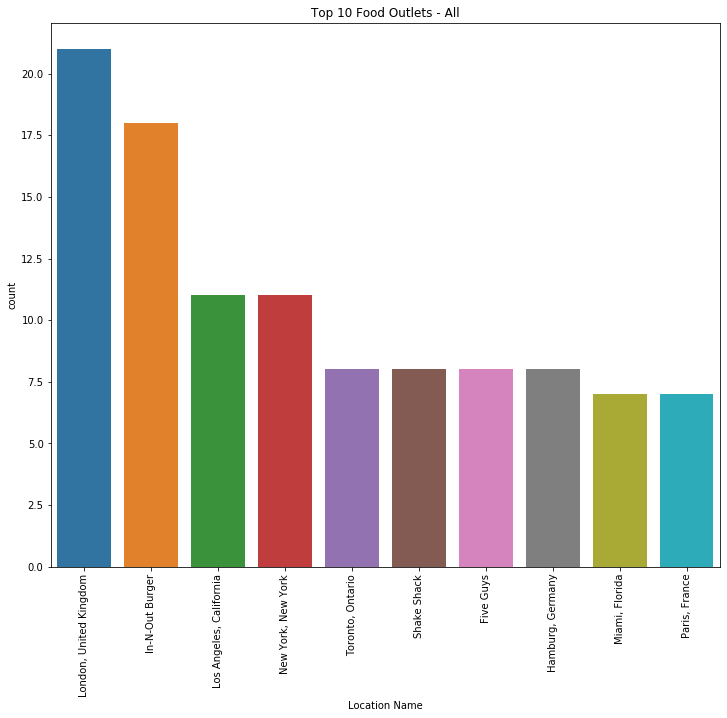

In [15]:
plt.figure(figsize=[12,10])
g = sns.countplot(data=with_loc, x='location_name', order=with_loc['location_name'].value_counts()[0:10].index)
plt.xlabel('Location Name')
plt.title('Top 10 Food Outlets - All')
g.set_xticklabels(g.get_xticklabels(), rotation=90)

plt.savefig("img/top_10_outlets.png", format="png")

## Top additional hashtags (per each df of hashtag)

# #kale df

In [16]:
# list of strings
kale_str = [row for row in df_kale['hashtags'].str.strip(to_strip=".!? \n\t\'")]  
# convert to list of lists
kale_hashtags = [ast.literal_eval(x) for x in kale_str] 

In [17]:
kale_text = " ".join(str(post) for post in kale_hashtags)
kale_text2 = re.sub('[^A-Za-z]+', ' ', kale_text).strip()

In [18]:
# kale wc, WITH the 'kale' word included
# stopwords = set(STOPWORDS)
# wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(kale_text2)

# plt.figure(figsize=[12,10])
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")

# plt.savefig("img/kale_wc_1.png", format="png")

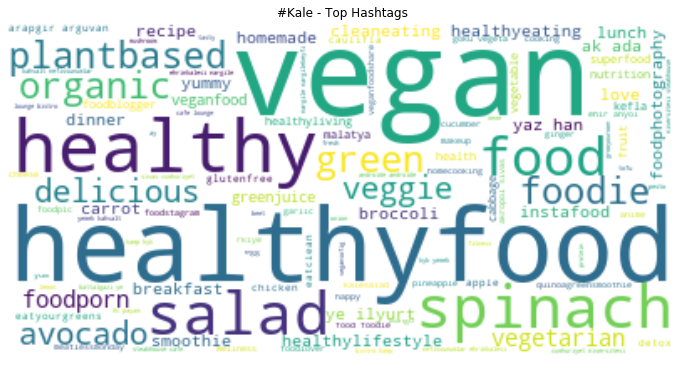

In [19]:
# #kale df
# without the word 'kale'
stopwords2 = set(STOPWORDS)
stopwords2.update(["kale"])

wordcloud = WordCloud(stopwords=stopwords2, background_color="white").generate(kale_text2)

plt.figure(figsize=[12,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('#Kale - Top Hashtags')
plt.savefig("img/kale_wc_top.png", format="png")


In [20]:
# kale wordcloud frequency of top words
kale_dict = wordcloud.words_
kale_freq = pd.DataFrame.from_dict(kale_dict, orient='index')
kale_freq.to_csv(r'data\kale_freq.csv')

# #fries df


In [21]:
# list of strings
fries_list = [row for row in df_fries['hashtags'].str.strip(to_strip=".!? \n\t\'\[\]")]  
fries_text = " ".join(str(t) for t in fries_list)
fries_text2 = re.sub('[^A-Za-z]+', ' ', fries_text).strip()

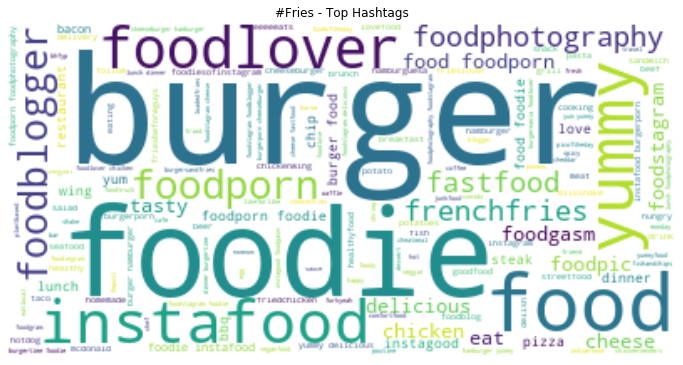

In [22]:
# fries wc WITHOUT 'fries' word
stopwords = set(STOPWORDS)
stopwords.update(["fries"])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(fries_text2)

plt.figure(figsize=[12,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('#Fries - Top Hashtags')
plt.savefig("img/fries_wc_top.png", format="png")


In [23]:
# fries wordcloud frequency of top words
fries_dict = wordcloud.words_
fries_freq = pd.DataFrame.from_dict(fries_dict, orient='index')
fries_freq.to_csv(r'data\fries_freq.csv')

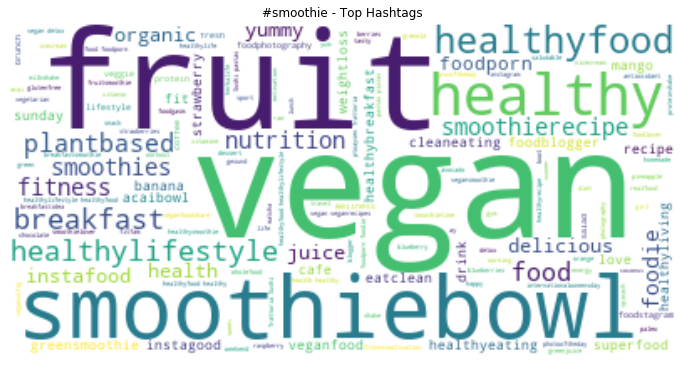

In [24]:
# #smoothie df
# smoothie wc WITHOUT 'smoothie' word

smoothie_list = [row for row in df_smoothie['hashtags'].str.strip(to_strip=".!? \n\t\'\[\]")] 
smoothie_text = " ".join(str(t) for t in smoothie_list)
smoothie_text2 = re.sub('[^A-Za-z]+', ' ', smoothie_text).strip()

stopwords = set(STOPWORDS)
stopwords.update(["smoothie"])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(smoothie_text2)

plt.figure(figsize=[12,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('#smoothie - Top Hashtags')
plt.savefig("img/smoothie_wc_top.png", format="png")

In [25]:
# smoothie wordcloud frequency of top words
smoothie_dict = wordcloud.words_
smoothie_freq = pd.DataFrame.from_dict(smoothie_dict, orient='index')
smoothie_freq.to_csv(r'data\smoothie_freq.csv')

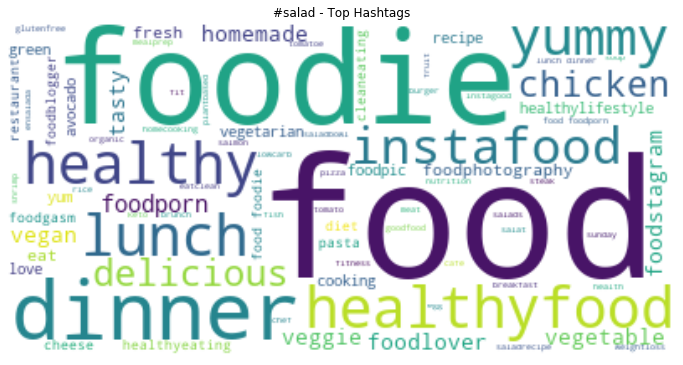

In [33]:
# #salad df
# salad wc WITHOUT 'salad' word

salad_list = [row for row in df_salad['hashtags'].str.strip(to_strip=".!? \n\t\'\[\]")] 
salad_text = " ".join(str(t) for t in salad_list)
salad_text2 = re.sub('[^A-Za-z]+', ' ', salad_text).strip()

stopwords = set(STOPWORDS)
stopwords.update(["salad"])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(salad_text2)

plt.figure(figsize=[12,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('#salad - Top Hashtags')
plt.savefig("img/salad_wc_top.png", format="png")

In [34]:
# salad wordcloud frequency of top words
salad_dict = wordcloud.words_
salad_freq = pd.DataFrame.from_dict(salad_dict, orient='index')
salad_freq.to_csv(r'data\salad_freq.csv')

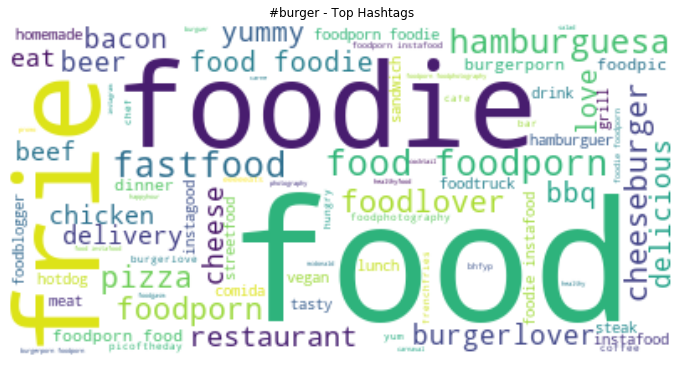

In [28]:
# #burger df
# burger wc WITHOUT 'burger' word

burger_list = [row for row in df_burger['hashtags'].str.strip(to_strip=".!? \n\t\'\[\]")] 
burger_text = " ".join(str(t) for t in burger_list)
burger_text2 = re.sub('[^A-Za-z]+', ' ', burger_text).strip()

stopwords = set(STOPWORDS)
stopwords.update(["burger", "burgers", "hamburger", "hamburgers"])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(burger_text2)

plt.figure(figsize=[12,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('#burger - Top Hashtags')
plt.savefig("img/burger_wc_top.png", format="png")

In [29]:
# burger wordcloud frequency of top words
burger_dict = wordcloud.words_
burger_freq = pd.DataFrame.from_dict(burger_dict, orient='index')
burger_freq.to_csv(r'data\burger_freq.csv')

## Top 20 Outlets per Hashtag

In [30]:
kale_with_loc = df_kale.dropna(subset=['location_name'])
fries_with_loc = df_fries.dropna(subset=['location_name'])
smoothie_with_loc = df_smoothie.dropna(subset=['location_name'])
salad_with_loc = df_salad.dropna(subset=['location_name'])
burger_with_loc = df_burger.dropna(subset=['location_name'])

In [31]:
# fries_with_loc['location_name'].value_counts()

In [88]:
# # #fries top 20 outlets
# plt.figure(figsize=[12,10])
# g = sns.countplot(data=fries_with_loc, x='location_name', order=fries_with_loc['location_name'].value_counts()[0:20].index)
# plt.xlabel('Location Name')
# plt.title('#fries - Top 20 Food Outlets')
# g.set_xticklabels(g.get_xticklabels(), rotation=90)

# plt.savefig("img/fries_top20outlets.png", format="png")

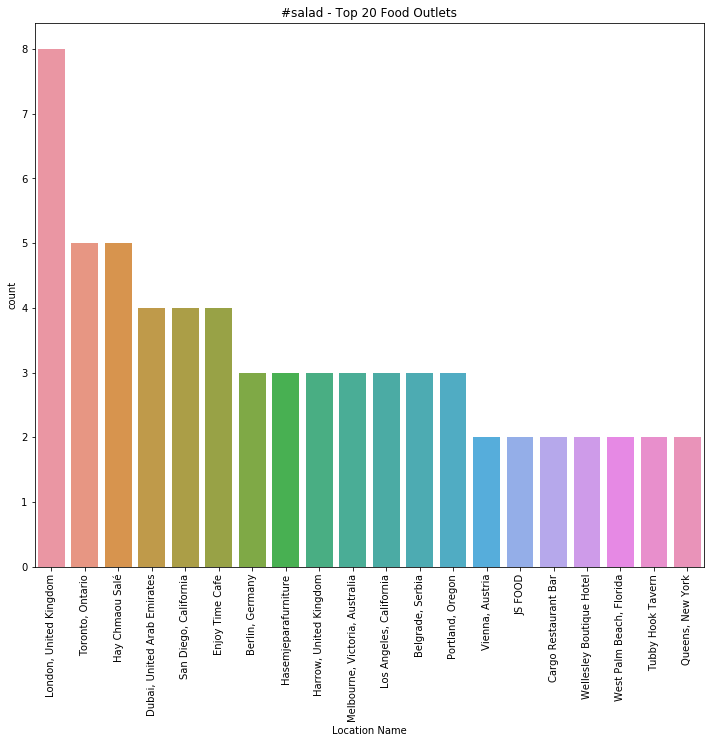

In [36]:
# #salad top 20 outlets
plt.figure(figsize=[12,10])
g = sns.countplot(data=salad_with_loc, x='location_name', order=salad_with_loc['location_name'].value_counts()[0:20].index)
plt.xlabel('Location Name')
plt.title('#salad - Top 20 Food Outlets')
g.set_xticklabels(g.get_xticklabels(), rotation=90)

plt.savefig("img/salad_top20outlets.png", format="png")

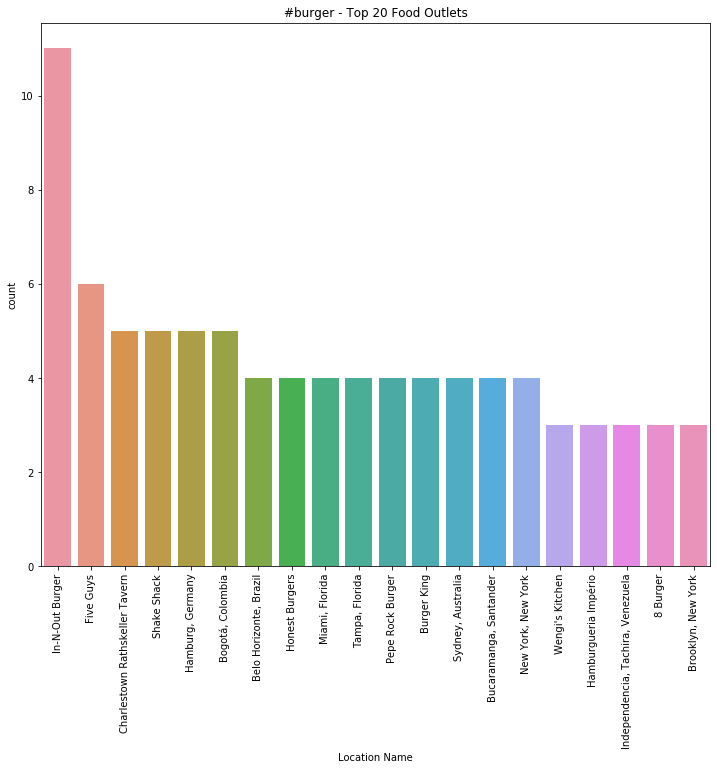

In [32]:
# #burger top 20 outlets
plt.figure(figsize=[12,10])
g = sns.countplot(data=burger_with_loc, x='location_name', order=burger_with_loc['location_name'].value_counts()[0:20].index)
plt.xlabel('Location Name')
plt.title('#burger - Top 20 Food Outlets')
g.set_xticklabels(g.get_xticklabels(), rotation=90)

plt.savefig("img/burger_top20outlets.png", format="png")